# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Jake Roll</p>
# <p style="text-align: right;"> &#9989; Put your _GitHub username_ here: Jakeroll04</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/JakeRoll04/cmse202-f25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [33]:
# put your code here
import pandas as pd

# Download data
!curl -o diabetes_prediction_dataset.csv https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv

# Load in data
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3721k  100 3721k    0     0  10.1M      0 --:--:-- --:--:-- --:--:-- 10.1M


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [52]:
print(diabetes.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [51]:
len(diabetes)

100000

How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> There are 100000 patients, the features are: 'gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'.

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [10]:
# put your code here
diabetes.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [14]:
print(diabetes['gender'].unique())
print(diabetes['smoking_history'].unique())
print(diabetes['diabetes'].unique())

['Female' 'Male' 'Other']
['never' 'No Info' 'current' 'former' 'ever' 'not current']
[0 1]


In [34]:
diabetes['gender'] = diabetes['gender'].map({'Male': 1, 'Female': 0, 'Other': 2})
diabetes['smoking_history'] = diabetes['smoking_history'].map({'never': 0, 'No Info': 1, 'former': 2, 'current': 3, 'ever': 4, 'not current': 5})
diabetes['diabetes'] = diabetes['diabetes'].map({0: -1, 1: 1})
print(diabetes.dtypes)

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [36]:
diabetes['diabetes'].unique()

array([-1,  1])

### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [38]:
# copy your perceptron class to his cell
import numpy as np

class Perceptron:
    
    def __init__(self, labeled_data, iters, learning_rate):
        """
        Initializes the perceptron model.
        Args:
            labeled_data: A list of samples, each row is [feature1, feature2, label]
            iters: Number of iterations to train
            learning_rate: Step size for weight updates
        """
        self.data = np.array(labeled_data)
        self.iters = iters
        self.learning_rate = learning_rate
        
        # Number of features (exclude label)
        num_features = self.data.shape[1] - 1
        
        # Weights = [bias, w1, w2]
        self.weights = np.ones(num_features + 1)

    def predict(self, feature_vector):
        """
        Predicts the class label (+1 or -1) for a single feature vector.
        """
        features = np.array(feature_vector)
        features_with_bias = np.insert(features, 0, 1)  # Insert bias term
        result = np.dot(features_with_bias, self.weights)
        return 1 if result >= 0 else -1

    def fit(self):
        """
        Trains the perceptron using the labeled data over the specified number of iterations.
        """
        for _ in range(self.iters):
            for row in self.data:
                features = row[:-1]  # [feature1, feature2]
                actual_label = row[-1]  # true label (+1 or -1)
                prediction = self.predict(features)
                
                if prediction != actual_label:
                    # Update rule: w = w + learning_rate * (y - ŷ) * x
                    self.weights[0] += self.learning_rate * (actual_label - prediction)  # update bias
                    for j in range(1, len(self.weights)):
                        self.weights[j] += self.learning_rate * (actual_label - prediction) * features[j-1]

    def errors(self):
        """
        Prints the number of misclassifications on the training data and the current weights.
        """
        error_count = 0
        for row in self.data:
            features = row[:-1]
            actual_label = row[-1]
            prediction = self.predict(features)
            if prediction != actual_label:
                error_count += 1

        print(f"Number of errors: {error_count}")
        print(f"Weights: {self.weights[1:]}")
        print(f"Bias: {self.weights[0]}")

* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [42]:
# put your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert to numpy and split
data_array = diabetes.values
train_data, test_data = train_test_split(data_array, test_size=0.3, random_state=42)

# Train
percep = Perceptron(train_data, iters=10, learning_rate=0.1)
percep.fit()

* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [44]:
# put your code here
X_test = test_data[:, :-1]
y_true = test_data[:, -1]
y_pred = [percep.predict(x) for x in X_test]

# Accuracy
acc = accuracy_score(y_true, y_pred)
print(y_pred)
print(f"Accuracy: {acc:.2f}")

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,

* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [53]:
# put your code here
data_array = diabetes.values
train_data, test_data = train_test_split(data_array, test_size=0.3, random_state=42)

percep = Perceptron(train_data, iters=100, learning_rate=0.2)
percep.fit()

X_test = test_data[:, :-1]
y_true = test_data[:, -1]
y_pred = [percep.predict(x) for x in X_test]

acc = accuracy_score(y_true, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.96


100 Iterations and a .2 learning rate gives me a 96% accuracy, which is optimal.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [1]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
import pandas as pd
!curl -o Telecust1.csv https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv

customer = pd.read_csv('Telecust1.csv')
customer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29048  100 29048    0     0   355k      0 --:--:-- --:--:-- --:--:--  359k


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C


In [2]:
customer.dtypes

region      int64
tenure      int64
age         int64
income      int64
marital     int64
address     int64
ed          int64
employ      int64
retire      int64
gender      int64
reside      int64
custcat    object
dtype: object

In [3]:
customer['custcat'].unique()

array(['A', 'D', 'C', 'B'], dtype=object)

In [4]:
customer['custcat'] = customer['custcat'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3})

customer.dtypes

region     int64
tenure     int64
age        int64
income     int64
marital    int64
address    int64
ed         int64
employ     int64
retire     int64
gender     int64
reside     int64
custcat    int64
dtype: object

---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [5]:
# put your modified perceptron class here
import numpy as np

class Perceptron:
    
    def __init__(self, labeled_data, iters, learning_rate):
        """
        Initializes the perceptron model.
        Args:
            labeled_data: A list of samples, each row is [feature1, feature2, label]
            iters: Number of iterations to train
            learning_rate: Step size for weight updates
        """
        self.data = np.array(labeled_data)
        self.iters = iters
        self.learning_rate = learning_rate
        
        # Number of features (exclude label)
        num_features = self.data.shape[1] - 1
        
        # Weights = [bias, w1, w2]
        self.weights = np.ones(num_features + 1)

    def predict(self, feature_vector):
        """
        Predicts the class label (+1 or -1) for a single feature vector.
        """
        features = np.array(feature_vector)
        features_with_bias = np.insert(features, 0, 1)  # Insert bias term
        result = np.dot(features_with_bias, self.weights)
        return 1 if result >= 0 else -1


    def score(self, feature_vector):
        """
        Raw score = dot product of weights and features (+ bias).
        No activation function applied.
        """
        features = np.insert(np.array(feature_vector), 0, 1)
        return np.dot(features, self.weights)

    def fit(self):
        """
        Trains the perceptron using the labeled data over the specified number of iterations.
        """
        for _ in range(self.iters):
            for row in self.data:
                features = row[:-1]  # [feature1, feature2]
                actual_label = row[-1]  # true label (+1 or -1)
                prediction = self.predict(features)
                
                if prediction != actual_label:
                    # Update rule: w = w + learning_rate * (y - ŷ) * x
                    self.weights[0] += self.learning_rate * (actual_label - prediction)  # update bias
                    for j in range(1, len(self.weights)):
                        self.weights[j] += self.learning_rate * (actual_label - prediction) * features[j-1]

    def errors(self):
        """
        Prints the number of misclassifications on the training data and the current weights.
        """
        error_count = 0
        for row in self.data:
            features = row[:-1]
            actual_label = row[-1]
            prediction = self.predict(features)
            if prediction != actual_label:
                error_count += 1

        print(f"Number of errors: {error_count}")
        print(f"Weights: {self.weights[1:]}")
        print(f"Bias: {self.weights[0]}")


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [6]:
# put your code here
from sklearn.model_selection import train_test_split
X = customer.drop(columns=['custcat']).values
y = customer['custcat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

y_train_sets = {}
y_test_sets = {}

for class_label in range(4):  # classes: 0, 1, 2, 3, 4
    # For training labels
    y_train_sets[class_label] = np.where(y_train == class_label, 1, -1)
    # For test labels (used for evaluating OvR later)
    y_test_sets[class_label] = np.where(y_test == class_label, 1, -1)

* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [7]:
# put your code here
# Loop code from chatgpt.com prompt: Use 5 training label sets to train 5 perceptrons.
from sklearn.metrics import accuracy_score

# Store all perceptrons in a dictionary
perceptrons = {}
accuracies = {}

# Loop over each class (0 to 4)
for class_label in range(4):
    # Combine features and binary labels for this class
    train_data = np.hstack((X_train, y_train_sets[class_label].reshape(-1, 1)))
    
    # Train a Perceptron for this class
    p = Perceptron(train_data, iters=10, learning_rate=0.1)
    p.fit()
    
    # Store the model
    perceptrons[class_label] = p
    
    # Predict on training set
    y_pred = [p.predict(x) for x in X_train]
    
    # Compute accuracy
    acc = accuracy_score(y_train_sets[class_label], y_pred)
    accuracies[class_label] = acc
    print(f"Perceptron for class {class_label}: Accuracy = {acc:.2f}")


Perceptron for class 0: Accuracy = 0.68
Perceptron for class 1: Accuracy = 0.58
Perceptron for class 2: Accuracy = 0.72
Perceptron for class 3: Accuracy = 0.71


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [8]:
# put your code here
y_pred = []

for x in X_test:
    # Get score from each perceptron
    scores = [perceptrons[class_label].score(x) for class_label in range(4)]
    
    # Pick class with highest score
    predicted_label = np.argmax(scores)
    y_pred.append(predicted_label)

# Step 2: Compute accuracy
accuracy_ovr = accuracy_score(y_test, y_pred)
print(f"One-vs-Rest Test Accuracy: {accuracy_ovr:.2f}")

One-vs-Rest Test Accuracy: 0.29


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> It is not good, as it has a 29% accuracy.


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [9]:
# put your code here.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

customer_200 = customer.iloc[:200]

X = customer_200.drop(columns = ['custcat']).values
y = customer_200['custcat'].values

train_vectors, test_vectors, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state =42)

tmp_vectors = train_vectors
tmp_labels = train_labels

param_grid = {
    'C': [1e-2, 1e-1, 1e0, 1e1],
    'gamma': [1e-4, 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'sigmoid', 'rbf']}

clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

Best estimator found by grid search:
SVC(C=10.0, class_weight='balanced', gamma=0.0001, kernel='linear')
Best parameters found by grid search:
{'C': 10.0, 'gamma': 0.0001, 'kernel': 'linear'}


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

In [10]:
# put your code here
from sklearn.metrics import confusion_matrix
print("Predicting names on the test set")
pred_labels = clf.predict(test_vectors)

print("Accuracy =", 100*accuracy_score(test_labels, pred_labels), '%')
print(confusion_matrix(test_labels, pred_labels))

Predicting names on the test set
Accuracy = 46.666666666666664 %
[[8 2 1 3]
 [2 8 5 4]
 [3 3 7 2]
 [1 4 2 5]]


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> Yes, slightly better.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA
Run gridsearch with PCA


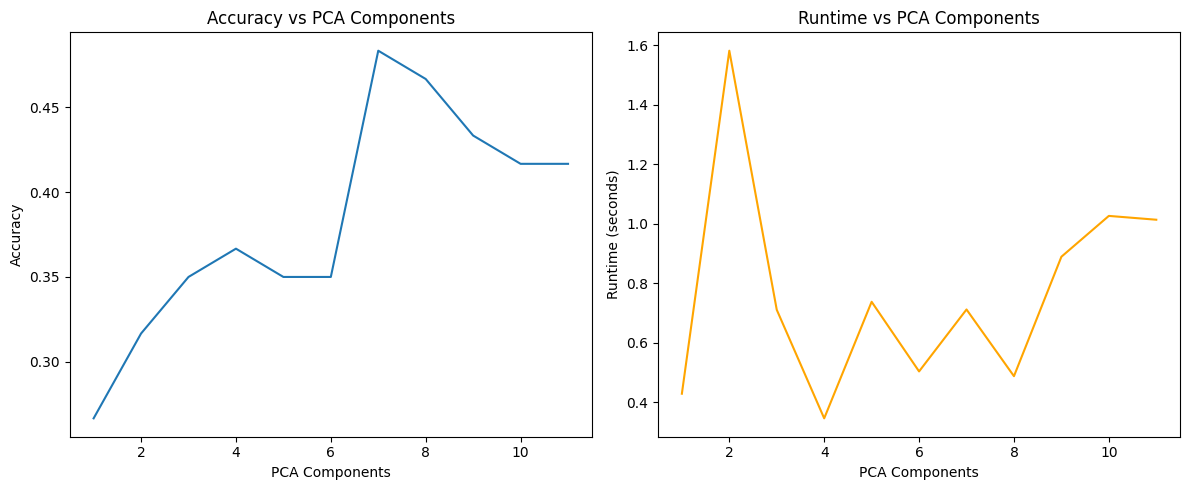

In [15]:
# put your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from time import time

customer_200 = customer.iloc[:200]

X = customer_200.drop(columns = ['custcat']).values
y = customer_200['custcat'].values

train_vectors, test_vectors, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state =42)


param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale'],
    'kernel': ['linear', 'rbf']}

accuracies = []
runtimes = []

for i in range(1,12):
    print('Run gridsearch with PCA')
    start = time()

    # Apply PCA
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(train_vectors)
    X_test_pca = pca.transform(test_vectors)
    
    # Grid search
    grid = GridSearchCV(SVC(), param_grid, cv=3, n_jobs=1)
    grid.fit(X_train_pca, train_labels)
    
    # Predict and record accuracy
    y_pred = grid.predict(X_test_pca)
    acc = accuracy_score(test_labels, y_pred)
    elapsed = time() - start
    
    accuracies.append(acc)
    runtimes.append(elapsed)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), accuracies)
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.title("Accuracy vs PCA Components")

# Plot Time vs. Components
plt.subplot(1, 2, 2)
plt.plot(range(1, 12), runtimes, color='orange')
plt.xlabel("PCA Components")
plt.ylabel("Runtime (seconds)")
plt.title("Runtime vs PCA Components")

plt.tight_layout()
plt.show()

Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

In [13]:
print(f"Test Accuracy with Best SVC: {acc:.2f}")

Test Accuracy with Best SVC: 0.42


<font size=6 color="#009600">&#9998;</font> Important features might be lost when reducing features through PCA.  

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> As the number of components increase, the run time increases, and more input features will naturally increase the run time for training.  

The accuracy with low amount of features is low because it may be leaving important features out, but as you get to 7-8 features the accuracy peaks and then goes back down, which means that eventually components may not add much new information or noise was added.  

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University